## Report
##### Här i första cellen importerar vi enbart olika biblotek samt main filen. 

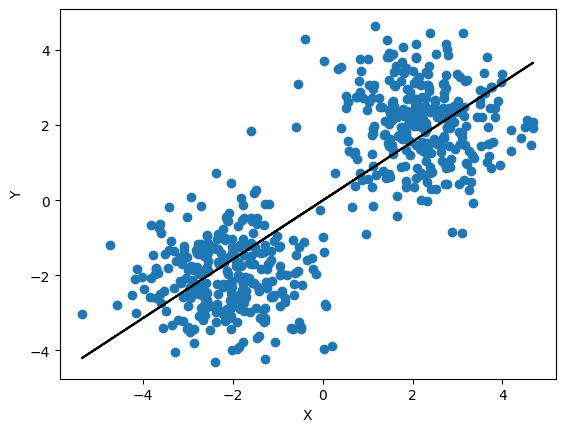

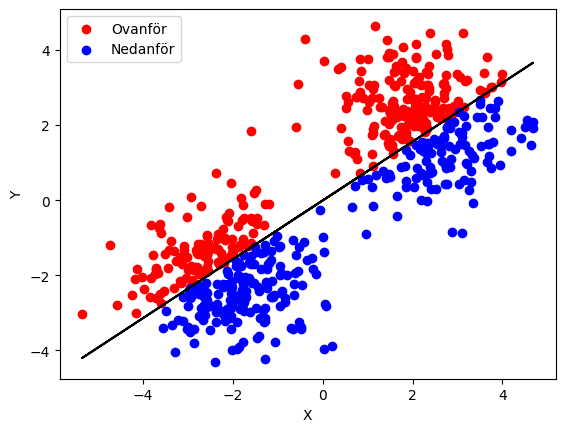

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import main as mi

##### Här räknar jag ut k och m för den vanliga linjen.

In [2]:
df = pd.read_csv("labelled_data.csv")
x = df["x"]
y = df["y"]
label = df["label"]
k, m = np.polyfit(x, y, 1)
y_linje = k*x + m

##### Här gör jag olika funktioner med uträkningar för att underlätta kodningen.

In [3]:
def f(x):
    return -0.489 * x

def g(x):
    return -2 * x + 0.16

def h(x):
    return 800 * x - 120

##### Här kodar jag grafen. Men den vanliga linjen. + Linjerna med de nya funktionerna. 

##### Jag skulle säga att de mesta skillnaderna här är att punkterna som är från 0 till minussidan på x led blir klassade som nedanför medan de som är 0 till plus blir klassade som ovanför om man jämför med den svarta linjen. Det gäller för f(x) och g(x).
##### Det jag märkt som är extrem skillnad det är h(x) då den har en extrem lutning så där påverkars inte punkterna av vart dem ligger i y led utan enbart i x led då det är som ett rakt streck i grafen. 

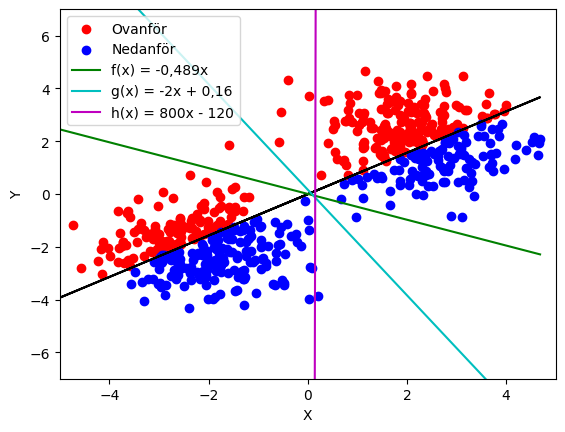

In [4]:
plt.scatter(x=df.loc[df['label'] == 1.0, "x"], 
            y=df.loc[df['label'] == 1.0, "y"],
            color='red', label='Ovanför')
plt.scatter(x=df.loc[df['label'] == 0.0, "x"], 
            y=df.loc[df['label'] == 0.0, "y"],
            color='blue', label='Nedanför')

x_linje = np.linspace(df["x"].min(), df["x"].max())
y_f = f(x_linje)
y_g = g(x_linje)
y_h = h(x_linje)



plt.plot(x, y_linje, 'k-')
plt.plot(x_linje, y_f, 'g-', label="f(x) = -0,489x")
plt.plot(x_linje, y_g, 'c-', label="g(x) = -2x + 0,16")
plt.plot(x_linje, y_h, 'm-', label="h(x) = 800x - 120")
plt.xlim(-5, 5)
plt.ylim(-7, 7)

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

##### Jag tycker att i detta fallen så är alla linjer förutom h(x) som är bra för klassifisering. Man i dessa 3 linjer så delar man in datan i olika mängder på ett bra sätt.
##### Jag tycker däremot att h(x) inte är så bra då det är en linje som har en extrem lutning och därav inte så bra för klassifisering. Då det ser ut som en streck rakt upp. Vilket inte speglar i vart punkterna är i y led utan enabrt vart dem är i x led.
##### Jag skulle säga att man kan hitta vädligt många linjer då det finns extremt många punkter och många kordinater man kan koda in dessa linjer på. 

##### Man märker även på df att label, f(x) och g(x) oftast är samma medan h(x) oftast inte är det. 

In [5]:
df["f(x)"] = np.where(y > f(x), 1.0, 0.0)
df["g(x)"] = np.where(y > g(x), 1.0, 0.0)
df["h(x)"] = np.where(y > h(x), 1.0, 0.0)

In [6]:
df.head()

,x,y,label,f(x),g(x),h(x)
0,-1.885908,-1.997408,0.0,0.0,0.0,1.0
1,2.090362,2.562490,1.0,1.0,1.0,0.0
2,-2.928221,0.082387,1.0,0.0,0.0,1.0
3,2.895800,2.435458,1.0,1.0,1.0,0.0
4,-2.358964,-1.038429,1.0,0.0,0.0,1.0
